# **Sales Prediction**

#**Setting Up the Environment**

In [2]:
!pip install google-cloud-bigquery pandas scikit-learn matplotlib

In [25]:
# Install fbprophet dependencies
!apt-get install -y --no-install-recommends python-dev python-pip

# Install Cython
!pip install --upgrade cython

# Install required libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install LunarCalendar
!pip install convertdate
!pip install holidays
!pip install setuptools-git
!pip install fbprophet


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

E: Package 'python-dev' has no installation candidate
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.7
    Uninstalling Cython-3.0.7:
      Successfully uninstalled Cython-3.0.7
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached fbprophe

In [24]:
!pip install google-cloud-bigquery pandas numpy statsmodels fbprophet matplotlib

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.8 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.2-py3-none-any.w

In [26]:
from google.cloud import bigquery
from google.colab import auth
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [27]:
# Authenticate user in Google Colab
auth.authenticate_user()
print('Authenticated')

Authenticated


In [28]:
# Set up BigQuery client with your project ID
project_id = 'datawarehouse-subject'  # Replace 'your-project-id' with your actual project ID
client = bigquery.Client(project=project_id)

#**Extracting Data from BigQuery**

In [29]:
# Function to fetch data from BigQuery
def fetch_data(query):
    query_job = client.query(query)
    return query_job.to_dataframe()

In [41]:
# Query to fetch sales data
query = """
SELECT
  PARSE_DATE('%Y%m%d', CAST(DateKey AS STRING)) as SaleDate,
  SUM(LineTotal) as TotalSales
FROM
  `datawarehouse-subject.OLAP.FactSales`
GROUP BY
  DateKey
ORDER BY
  DateKey
"""

# Execute the query and load the data into a pandas DataFrame
df_sales = client.query(query).to_dataframe()

# Print the first few rows of the dataframe to verify
print(df_sales.head())

     SaleDate    TotalSales
0  2011-05-31  5.038059e+06
1  2011-06-01  1.393152e+05
2  2011-06-02  1.501218e+05
3  2011-06-03  7.156540e+04
4  2011-06-04  1.501218e+05


#**Data Preprocessing & Exploratory Data Analysis**

In [42]:
# Example: Check for null values
sales_data.isnull().sum()


Date          0
TotalSales    0
dtype: int64

In [43]:
# Ensure the SaleDate is the index
df_sales.set_index('SaleDate', inplace=True)


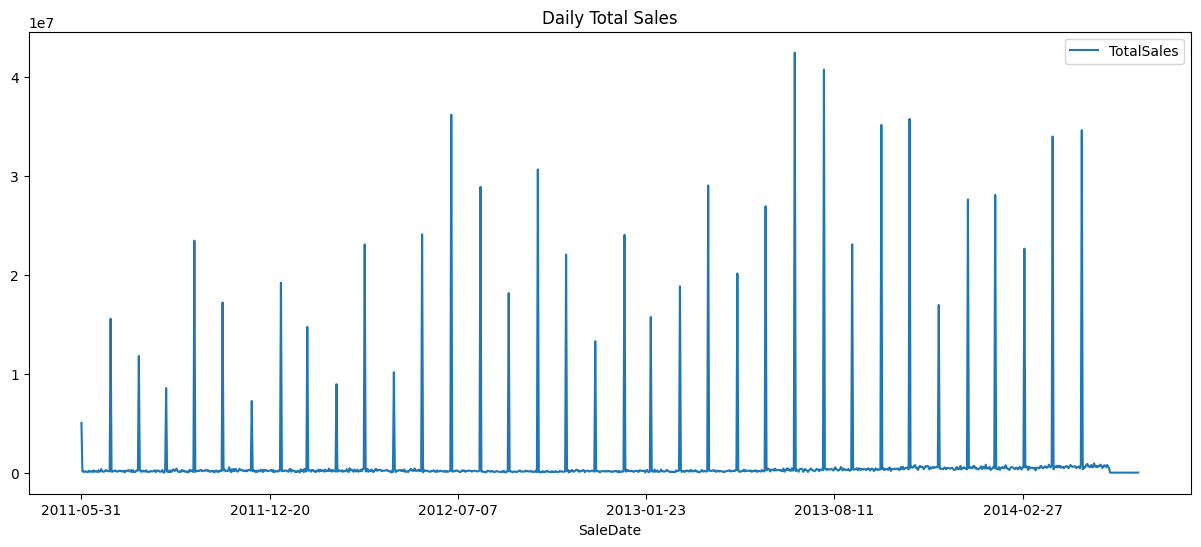

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Sales trend over time
df_sales.plot(figsize=(15, 6))
plt.title('Daily Total Sales')
plt.show()

In [45]:
### Step 4: Time-Series Forecasting Model
arima_model = ARIMA(df_sales['TotalSales'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Print out the summary information of the model
print(arima_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             TotalSales   No. Observations:                 1124
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18763.679
Date:                Tue, 16 Jan 2024   AIC                          37533.357
Time:                        03:52:57   BIC                          37548.429
Sample:                             0   HQIC                         37539.053
                               - 1124                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0263      0.368     -0.071      0.943      -0.748       0.696
ma.L1         -0.9970      0.007   -151.641      0.000      -1.010      -0.984
sigma2       2.37e+13   2.89e-13    8.2e+25      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


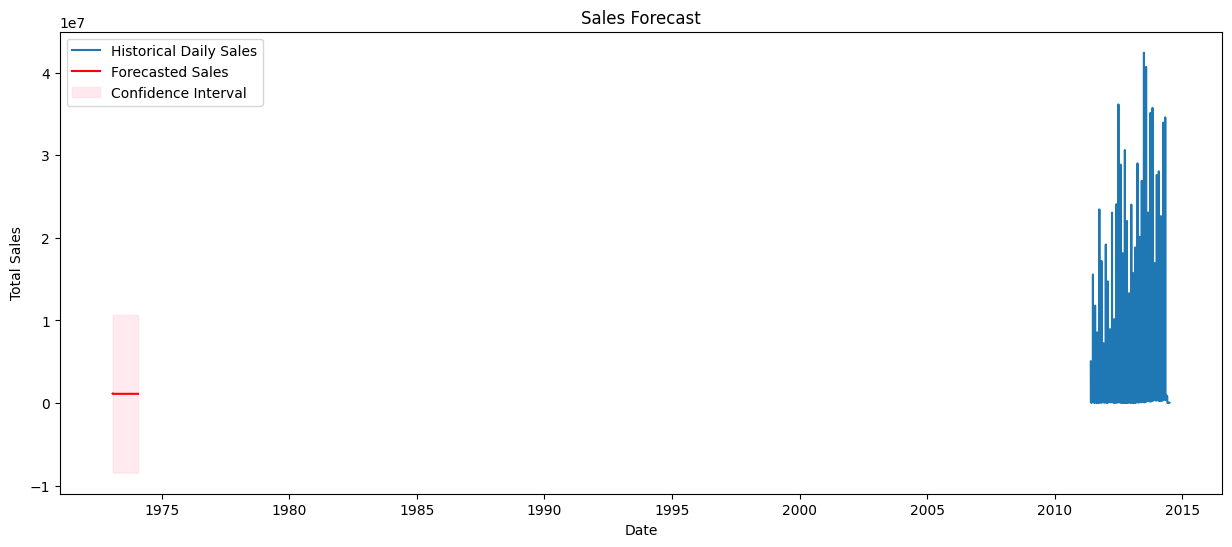

In [49]:
# Forecast the next N time periods.
forecast_periods =365
forecast_result = arima_result.get_forecast(steps=forecast_periods)
forecast_df = forecast_result.summary_frame()

# Plot the forecast alongside historical data
plt.figure(figsize=(15, 6))
plt.plot(df_sales.index, df_sales['TotalSales'], label='Historical Daily Sales')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecasted Sales', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


#**Model Building**

In [14]:
# Fit ARIMA model (adjust p, d, q parameters as needed)
model = ARIMA(sales_data['TotalDue'], order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
# Forecasting for each month in 2015
forecast_2015 = model_fit.forecast(steps=365)  # Assuming daily data

# Convert forecast to DataFrame and set DateTime index
forecast_dates = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=365)
forecast_2015_df = pd.DataFrame(forecast_2015, index=forecast_dates, columns=['TotalDue'])

# Aggregate forecast data to monthly
forecast_2015_df['Month'] = forecast_2015_df.index.month
monthly_forecast_2015 = forecast_2015_df.groupby('Month')['TotalDue'].sum()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


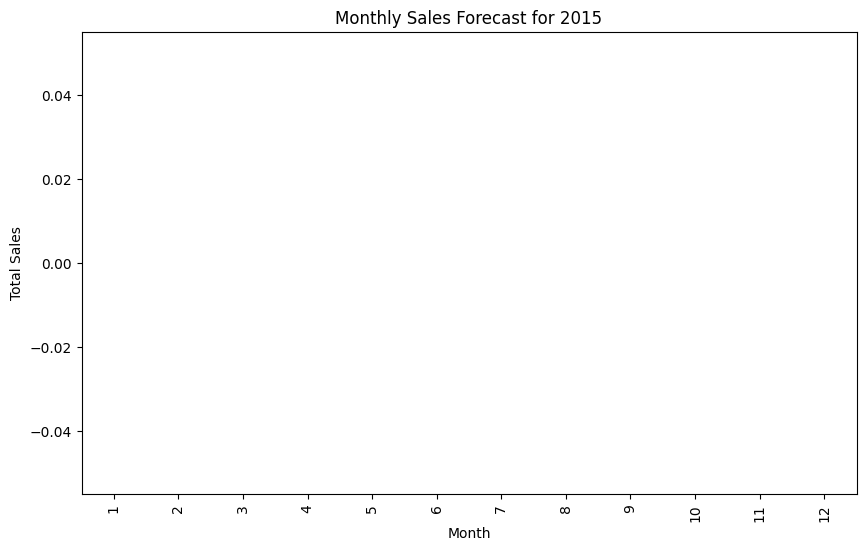

In [16]:
# Plot the forecast for each month in 2015
plt.figure(figsize=(10, 6))
monthly_forecast_2015.plot(kind='bar')
plt.title('Monthly Sales Forecast for 2015')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()